In [137]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Initial Data Exploration

In [138]:
path = "Data/winequality-red.csv"


In [139]:
df_red = pd.read_csv("Data/winequality-red.csv",low_memory=False,delimiter=";")
df_white = pd.read_csv("Data/winequality-white.csv",low_memory=False,delimiter=";")

In [140]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [142]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [143]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [144]:
sum(df_white.duplicated())

937

In [145]:
df_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [146]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [147]:
color_red=np.repeat('red',1599)
color_white=np.repeat('white',4898)

In [148]:
df_red['color']=color_red
df_white['color']=color_white

In [151]:
wine_df=df_red.append(df_white,ignore_index=True)

In [152]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [60]:
wine_df.to_csv("Data/winequality_edited.csv",index=False)

## DataFrame Histogram Matrix

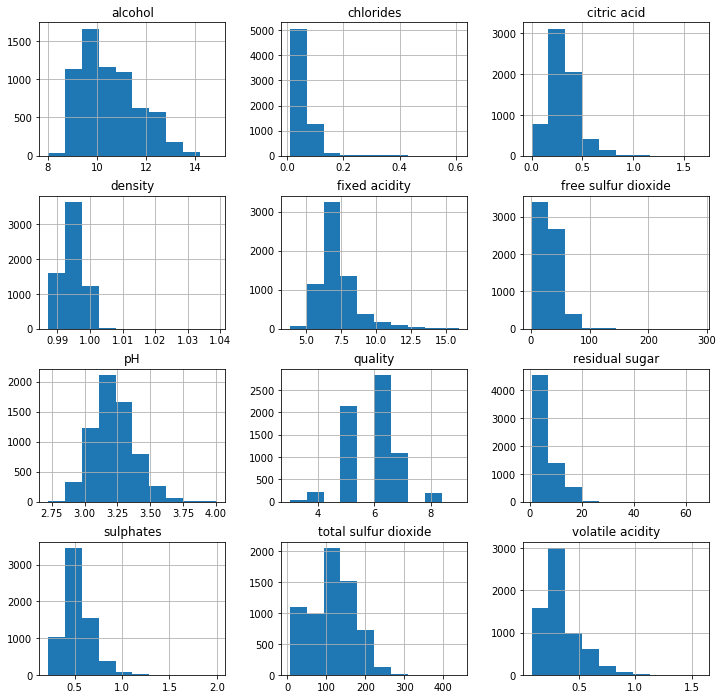

In [153]:
wine_df.hist(figsize=(12,12));

## DataFrame ScatterPlot Matrix

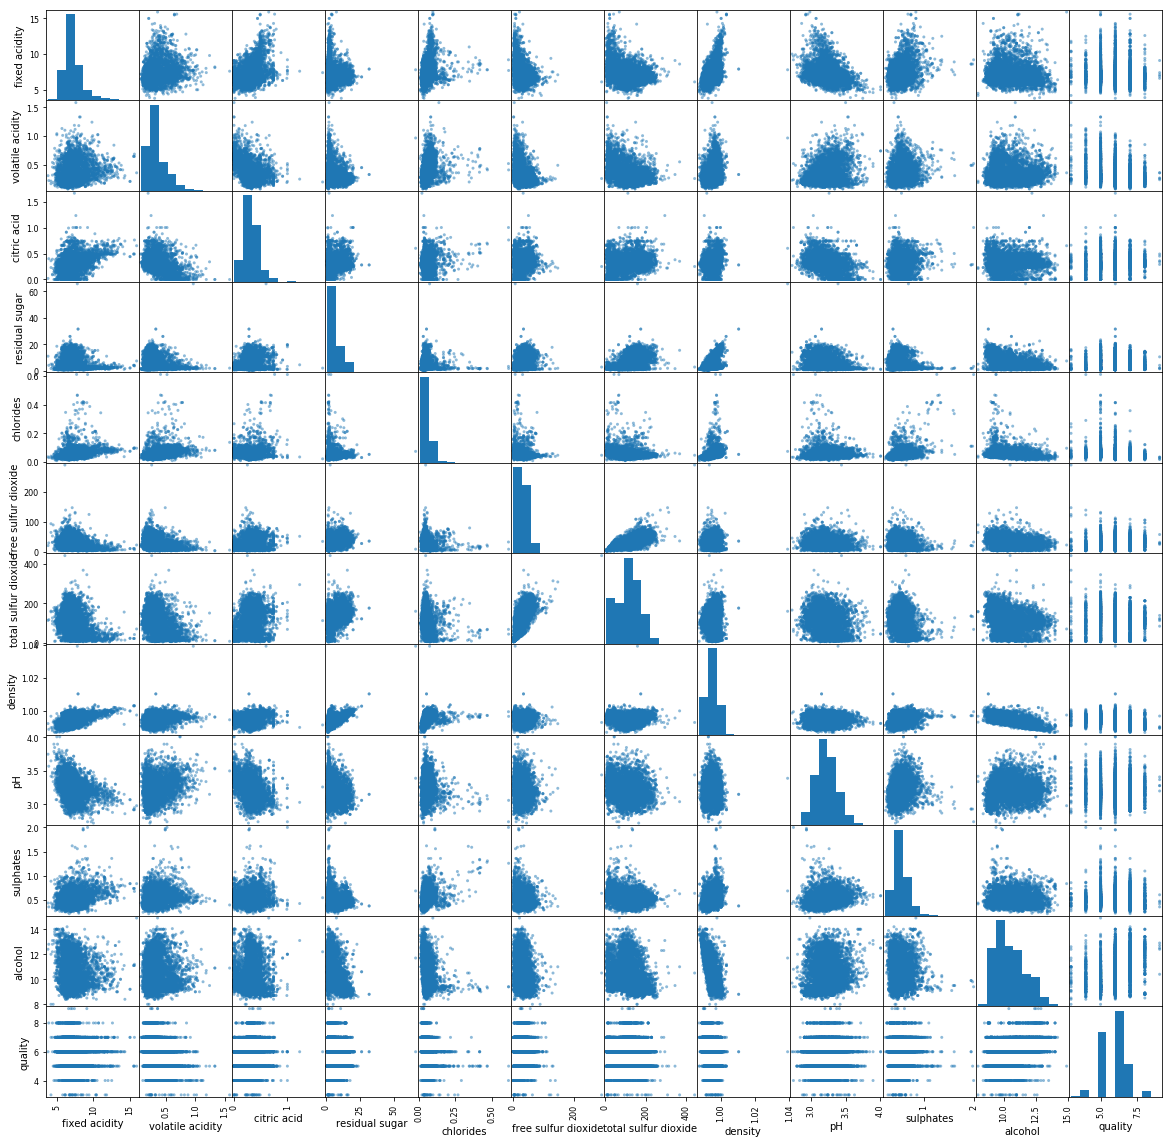

In [66]:
pd.plotting.scatter_matrix(wine_df,figsize=(20,20));

# Analysis

## Proportion of Red and White Wines by Quality

In [238]:
#counts of color of wine for different quality ratings
color_counts = wine_df.groupby(['color','quality']).count()['pH']

In [236]:
color_totals = wine_df.groupby('color').count()['pH']

In [237]:
red_proportion = color_counts['red']/color_totals['red']
white_proportion = color_counts['white']/color_totals['white']

In [249]:
red_proportion['9']=0 # as value for quality 9 is not present

In [265]:
ind=np.arange(len(red_proportion))
width = 0.35

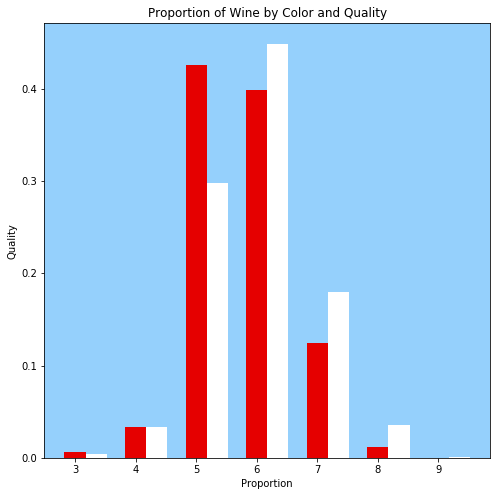

In [267]:
fig,ax=plt.subplots(figsize=(8,8))
ax.set_facecolor('xkcd:light blue')

plt.bar(ind,red_proportion,width,color='xkcd:red',label='Red Wine') #red bars
plt.bar(ind+width,white_proportion,width,color='xkcd:white',label='White Wine')#white bars

plt.title("Proportion of Wine by Color and Quality")
plt.xlabel("Proportion")
plt.ylabel("Quality")

locations = (ind+width)/2
labels=[3,4,5,6,7,8,9]
plt.xticks(ind,labels);

## Average Quality by Color

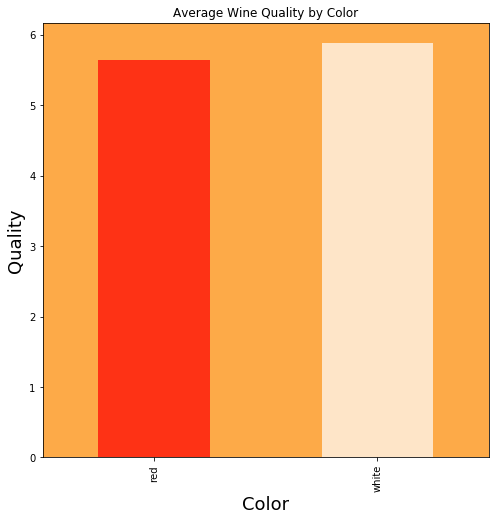

In [166]:
color_mean=wine_df.groupby('color')['quality'].mean()
color_mean.plot(kind='bar',figsize=(8,8),title='Average Wine Quality by Color', color=colors, alpha=0.7)

colors=['red','white']

fig, ax = plt.subplots()
plt.xlabel("Color",fontsize=18)
plt.ylabel("Quality",fontsize=18)
ax.set_facecolor('xkcd:light orange');

## Average Quality by Acidity Levels

In [175]:
#bin edges to cut the ph values in 4 groups. 5 values are needed taken from describe(). This inlcudes Min 25th , 50th, 75th percentile and Max values.
bin_edges=[2.72,3.11,3.21,3.32,4.01]

#cut function to cut the ph values in 4 groups <25%,25-50%,50-75%,>75%.
wine_df['acidity_levels']= pd.cut(wine_df['pH'],bin_edges,labels=['High','Moderately High','Medium','Low'])

Text(0,0.5,'Quality')

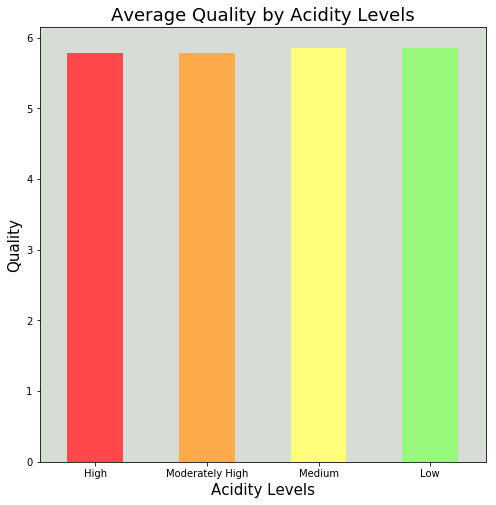

In [280]:
acidity_levels_mean=wine_df.groupby('acidity_levels')['quality'].mean()

fig,ax= plt.subplots()
ax.set_facecolor('xkcd:light gray')
colors = ['xkcd:light red','xkcd:light orange','xkcd:light yellow','xkcd:light green']

acidity_levels_mean.plot(kind='bar',figsize=(8,8),color=colors)
plt.xticks(rotation=0)

plt.title("Average Quality by Acidity Levels",fontsize=18)
plt.xlabel("Acidity Levels",fontsize=15)
plt.ylabel("Quality",fontsize=15)

## Average Quality Rating by Alcohol Content in Wine

### Method 1 : Using Pandas' cut to create a new column

In [223]:
#Creates a seperate coulmn for alcohol content
#the values for edges are found using df.describe() and taking min 50th percentile max values
alcohol_bin_edges=[8,10.3,14.9]
wine_df['alcohol_levels']= pd.cut(wine_df['alcohol'],alcohol_bin_edges,labels=['low alcohol','high alcohol'])

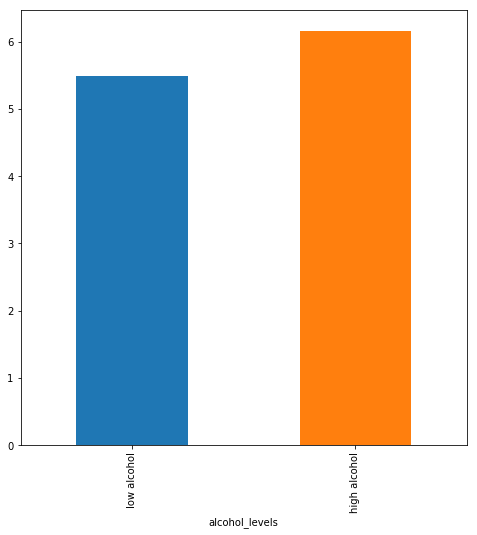

In [109]:
wine_df.groupby('alcohol_levels')['quality'].mean().plot(kind='bar',figsize=(8,8));

### Method 2 - Without Creating a new column

In [193]:
median = wine_df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_low_alcohol_quality = low['quality'].mean()
mean_high_alcohol_quality = high['quality'].mean()

<BarContainer object of 2 artists>

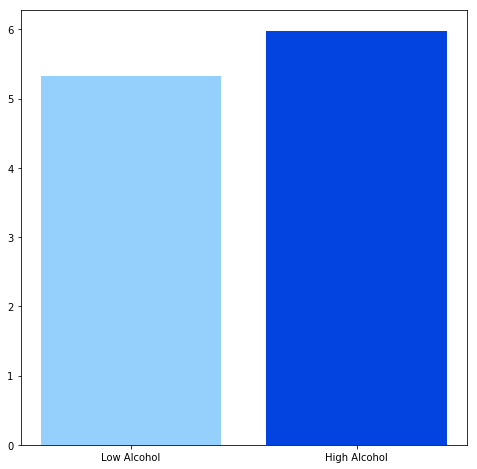

In [194]:
ax,fig= plt.subplots(figsize=(8,8))
locations=[1,2]
labels = ['Low Alcohol','High Alcohol']
colors = ['xkcd:light blue', 'xkcd:blue']
heights = [mean_low_alcohol_quality,mean_high_alcohol_quality]
plt.bar(locations,heights,tick_label=labels,color=colors)

## Average Quality Rating by Residual Sugar Levels

### Method 1: Using Pandas' cut to create a new column

In [196]:
sugar_bin_edges=[0.6,3.0,65.8]
wine_df['sugar_levels']= pd.cut(wine_df['residual sugar'],sugar_bin_edges,labels=['low residual sugar','high residual sugar'])

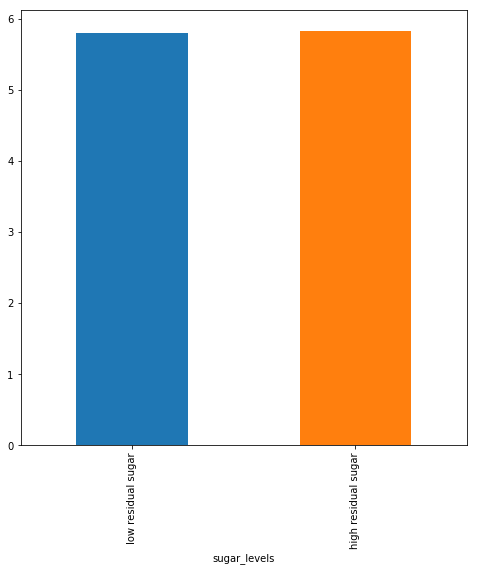

In [200]:
residual_sugar_means = wine_df.groupby('sugar_levels')['quality'].mean()
residual_sugar_means.plot(kind='bar',figsize=(8,8),tick_label=labels);

### Method 2: Without creating a new coulmn

In [220]:
wine_df.rename({'residual sugar':'residual_sugar'}, axis=1,inplace=True);

In [221]:
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

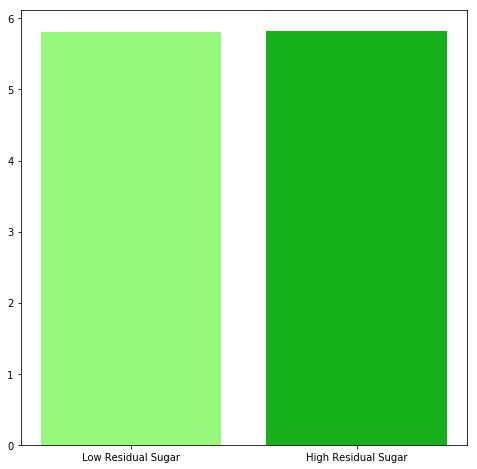

In [258]:
low_sugar_mean_quality = low['quality'].mean()
high_sugar_mean_quality = high['quality'].mean()

location=[1,2]
heights=[low_sugar_mean_quality,high_sugar_mean_quality]
colors = ['xkcd:light green','xkcd:green']
labels = ['Low Residual Sugar','High Residual Sugar']

ax,fig=plt.subplots(figsize=(8,8))
plt.bar(locations,heights,tick_label=labels,color=colors);